# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore', message=".*tf.train.Optimizer.*")
warnings.filterwarnings("ignore", message=".*tf.executing_eagerly_outside_functions.*")
warnings.filterwarnings("ignore")

# LOADING THE DATA

In [3]:
data=pd.read_excel(r"C:\Users\Divya\Documents\Data Scientist\IABAC Project\output.xlsx")

In [4]:
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0,4,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0,0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,20,8,3,8,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,7,7,0,3


# MODEL CREATION

In [5]:
#SPLITTING X AND Y 
X=data.drop("PerformanceRating",axis=1)
y=data["PerformanceRating"]

In [6]:
y.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

In [7]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [8]:
# Standardization technique is used
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[-0.54145787,  0.80942721, -0.17945861, ..., -0.68137224,
         1.10025139, -0.41733475],
       [ 1.10988772,  0.80942721, -0.17945861, ..., -0.37083419,
         0.8177735 , -0.41733475],
       [ 0.33925978,  0.80942721, -0.94311225, ..., -0.37083419,
         2.23016296, -0.41733475],
       ...,
       [ 1.44015684,  0.80942721,  0.58419504, ...,  0.25024191,
         1.10025139, -0.41733475],
       [-0.32127846, -1.23544154,  0.58419504, ...,  1.49239412,
         0.8177735 , -0.41733475],
       [-1.42217552, -1.23544154, -0.94311225, ..., -0.06029614,
        -1.15957175,  2.39615797]])

In [9]:
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_sc,y,test_size=0.3,random_state=10)

# 1. LOGISTIC REGRESSION

In [10]:
#Train the model
model_lr = LogisticRegression()
model_lr.fit(X_train_sc,y_train)

LogisticRegression()

In [11]:
#Predict the model
y_pred_lr=model_lr.predict(X_train_sc)
y_pred_lr

array([3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 4, 3, 4, 3, 4, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       2, 3, 3, 2, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 2, 3, 3, 2, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 4,
       3, 2, 3, 4, 3, 2, 2, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 2,
       3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 2, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,

In [12]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score:", accuracy_score(y_train,y_pred_lr))
print(classification_report(y_train,y_pred_lr))

Accuracy Score: 0.8345238095238096
              precision    recall  f1-score   support

           2       0.67      0.53      0.59       131
           3       0.86      0.92      0.89       610
           4       0.85      0.68      0.75        99

    accuracy                           0.83       840
   macro avg       0.79      0.71      0.75       840
weighted avg       0.83      0.83      0.83       840



In [13]:
confusion_matrix(y_train,y_pred_lr)

array([[ 70,  60,   1],
       [ 35, 564,  11],
       [  0,  32,  67]], dtype=int64)

# HyperParameter Tuning using GridSearch CV

In [14]:
#Tuning the Model
param_grid = {'C': [1, 5, 10,30,60,70,100], 
              'verbose': [0, 1, 3, 4, 5]
             } 
grid= GridSearchCV(model_lr, param_grid,verbose = 3,scoring='f1',cv=3)

In [15]:
grid.fit(X_sc,y)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV 1/3] END ......................C=1, verbose=0;, score=nan total time=   0.0s
[CV 2/3] END ......................C=1, verbose=0;, score=nan total time=   0.0s
[CV 3/3] END ......................C=1, verbose=0;, score=nan total time=   0.0s
[CV 1/3] END ......................C=1, verbose=1;, score=nan total time=   0.0s
[CV 2/3] END ......................C=1, verbose=1;, score=nan total time=   0.0s
[CV 3/3] END ......................C=1, verbose=1;, score=nan total time=   0.0s
[CV 1/3] END ......................C=1, verbose=3;, score=nan total time=   0.0s
[CV 2/3] END ......................C=1, verbose=3;, score=nan total time=   0.0s
[CV 3/3] END ......................C=1, verbose=3;, score=nan total time=   0.0s
[CV 1/3] END ......................C=1, verbose=4;, score=nan total time=   0.0s
[CV 2/3] END ......................C=1, verbose=4;, score=nan total time=   0.1s
[CV 3/3] END ......................C=1, verbose

[CV 1/3] END ....................C=100, verbose=5;, score=nan total time=   0.0s
[CV 2/3] END ....................C=100, verbose=5;, score=nan total time=   0.0s
[CV 3/3] END ....................C=100, verbose=5;, score=nan total time=   0.1s


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 30, 60, 70, 100],
                         'verbose': [0, 1, 3, 4, 5]},
             scoring='f1', verbose=3)

In [16]:
print("Best Parameters:",grid.best_params_)

Best Parameters: {'C': 1, 'verbose': 0}


In [17]:
model_lr1=LogisticRegression(C= 1,verbose=0, random_state=42)
model_lr1.fit(X_train_sc, y_train)

LogisticRegression(C=1, random_state=42)

In [18]:
X_train_sc.shape

(840, 26)

In [19]:
y_train.shape

(840,)

In [20]:
y_pred_lr1=model_lr1.predict(X_train_sc)

In [21]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score:", accuracy_score(y_train,y_pred_lr1))
print(classification_report(y_train,y_pred_lr1))

Accuracy Score: 0.8345238095238096
              precision    recall  f1-score   support

           2       0.67      0.53      0.59       131
           3       0.86      0.92      0.89       610
           4       0.85      0.68      0.75        99

    accuracy                           0.83       840
   macro avg       0.79      0.71      0.75       840
weighted avg       0.83      0.83      0.83       840



In [23]:
confusion_matrix(y_train,y_pred_lr1)

array([[ 70,  60,   1],
       [ 35, 564,  11],
       [  0,  32,  67]], dtype=int64)

# 2. SUPPORT VECTOR MACHINE

In [26]:
# Training the model
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [27]:
y_pred_svc= model_svc.predict(X_train)

In [31]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score", accuracy_score(y_train,y_pred_svc))
print("\n")
print(classification_report(y_train,y_pred_svc))

Accuracy Score 0.8869047619047619


              precision    recall  f1-score   support

           2       0.85      0.66      0.74       131
           3       0.89      0.96      0.93       610
           4       0.90      0.72      0.80        99

    accuracy                           0.89       840
   macro avg       0.88      0.78      0.82       840
weighted avg       0.89      0.89      0.88       840



# HyperParameter Tuning using GridSearch CV

In [32]:
param_grid1 = {'C': [1, 5, 10,30,60], 
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
model=SVC()
grid = GridSearchCV(model, param_grid1,verbose = 3,scoring='f1',cv=3)

In [33]:
grid.fit(X,y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ........................C=1, gamma=1;, score=nan total time=   0.1s
[CV 2/3] END ........................C=1, gamma=1;, score=nan total time=   0.1s
[CV 3/3] END ........................C=1, gamma=1;, score=nan total time=   0.1s
[CV 1/3] END ......................C=1, gamma=0.1;, score=nan total time=   0.0s
[CV 2/3] END ......................C=1, gamma=0.1;, score=nan total time=   0.0s
[CV 3/3] END ......................C=1, gamma=0.1;, score=nan total time=   0.1s
[CV 1/3] END .....................C=1, gamma=0.01;, score=nan total time=   0.0s
[CV 2/3] END .....................C=1, gamma=0.01;, score=nan total time=   0.0s
[CV 3/3] END .....................C=1, gamma=0.01;, score=nan total time=   0.0s
[CV 1/3] END ....................C=1, gamma=0.001;, score=nan total time=   0.0s
[CV 2/3] END ....................C=1, gamma=0.001;, score=nan total time=   0.0s
[CV 3/3] END ....................C=1, gamma=0.00

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 30, 60],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [34]:
print("Best Parameters are:",grid.best_params_)

Best Parameters are: {'C': 1, 'gamma': 1}


In [35]:
model_clf=SVC(C=1, gamma=1, random_state=42)
model_clf.fit(X_train, y_train)

SVC(C=1, gamma=1, random_state=42)

In [36]:
y_pred_svc1 = model_clf.predict(X_train)

In [37]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score", accuracy_score(y_train,y_pred_svc1))
print("\n")
print(classification_report(y_train,y_pred_svc1))

Accuracy Score 1.0


              precision    recall  f1-score   support

           2       1.00      1.00      1.00       131
           3       1.00      1.00      1.00       610
           4       1.00      1.00      1.00        99

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



In [38]:
confusion_matrix(y_train,y_pred_svc1)

array([[131,   0,   0],
       [  0, 610,   0],
       [  0,   0,  99]], dtype=int64)

# 3. DECISION TREE

In [39]:
model_dec=DecisionTreeClassifier()
model_dec.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred_dec = model_dec.predict(X_train)
y_pred_dec

array([2, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 4,
       3, 2, 3, 4, 2, 4, 3, 3, 3, 4, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       2, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 4, 3, 4, 3, 3, 2, 3,
       2, 3, 2, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 4, 2, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3,
       2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 2, 4, 3,
       3, 3, 3, 4, 4, 2, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 4, 3, 3, 3, 4, 3, 3, 3, 4, 4,
       3, 2, 3, 4, 3, 3, 2, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2,
       3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 2, 3, 4,
       3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,

In [44]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score", accuracy_score(y_train,y_pred_dec))
print("\n")
print(classification_report(y_train,y_pred_dec))

Accuracy Score 1.0


              precision    recall  f1-score   support

           2       1.00      1.00      1.00       131
           3       1.00      1.00      1.00       610
           4       1.00      1.00      1.00        99

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



# HyperParameter Tuning using GridSearch CV

In [45]:
#Tuning the model
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),
}

tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=3, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [46]:
model_dec1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf= 1,min_samples_split=2,splitter='best')
model_dec1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [49]:
y_pred_dec1 = model_dec1.predict(X_train)

In [50]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score", accuracy_score(y_train,y_pred_dec1))
print("\n")
print(classification_report(y_train,y_pred_dec1))

Accuracy Score 0.9321428571428572


              precision    recall  f1-score   support

           2       0.84      0.89      0.86       131
           3       0.95      0.96      0.95       610
           4       0.99      0.80      0.88        99

    accuracy                           0.93       840
   macro avg       0.92      0.88      0.90       840
weighted avg       0.93      0.93      0.93       840



# 4. RANDOM FOREST

In [58]:
model_rf=RandomForestClassifier()

In [59]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_pred_rf= model_rf.predict(X_train)

In [61]:
y_pred_rf

array([2, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 4,
       3, 2, 3, 4, 2, 4, 3, 3, 3, 4, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       2, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 4, 3, 4, 3, 3, 2, 3,
       2, 3, 2, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 4, 2, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3,
       2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 2, 4, 3,
       3, 3, 3, 4, 4, 2, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 4, 3, 3, 3, 4, 3, 3, 3, 4, 4,
       3, 2, 3, 4, 3, 3, 2, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2,
       3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 2, 3, 4,
       3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,

In [64]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score", accuracy_score(y_train,y_pred_dec1),"\n")
print(classification_report(y_train,y_pred_rf))

Accuracy Score 0.9321428571428572 

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       131
           3       1.00      1.00      1.00       610
           4       1.00      1.00      1.00        99

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



# HyperParameter Tuning using GridSearch CV

In [67]:
classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [68]:
model_gridrf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5}

In [70]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_train)

In [73]:
y_predict_rf

array([2, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 4,
       3, 2, 3, 4, 2, 4, 3, 3, 3, 4, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 4, 3, 4, 3, 3, 2, 3,
       2, 3, 2, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 4, 2, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3,
       2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 2, 4, 3,
       3, 3, 3, 4, 4, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 4, 3, 3, 3, 4, 3, 3, 3, 4, 4,
       3, 2, 3, 4, 3, 3, 2, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2,
       3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4,
       3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,

In [72]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score : ", accuracy_score(y_train,y_predict_rf),"\n")
print(classification_report(y_train,y_predict_rf))

Accuracy Score :  0.9845238095238096 

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       131
           3       0.98      1.00      0.99       610
           4       0.99      0.95      0.97        99

    accuracy                           0.98       840
   macro avg       0.99      0.97      0.98       840
weighted avg       0.98      0.98      0.98       840



# 5. GRADIENT BOOSTING

In [74]:
gb=GradientBoostingClassifier()

In [75]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [76]:
y_pred_gb = gb.predict(X_train)

In [78]:
y_pred_gb

array([2, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 4,
       3, 2, 3, 4, 2, 4, 3, 3, 3, 4, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       2, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 4, 3, 4, 3, 3, 2, 3,
       2, 3, 2, 4, 2, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 4, 2, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3,
       2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 2, 4, 3,
       3, 3, 3, 4, 4, 2, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 4, 3, 3, 3, 4, 3, 3, 3, 4, 4,
       3, 2, 3, 4, 3, 3, 2, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2,
       3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 2, 3, 4,
       3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,

In [79]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score : ", accuracy_score(y_train,y_pred_gb),"\n")
print(classification_report(y_train,y_pred_gb))

Accuracy Score :  0.9940476190476191 

              precision    recall  f1-score   support

           2       0.97      1.00      0.98       131
           3       1.00      0.99      1.00       610
           4       1.00      0.99      0.99        99

    accuracy                           0.99       840
   macro avg       0.99      0.99      0.99       840
weighted avg       0.99      0.99      0.99       840



# 6. NAIVE BAYES BERNOULLI

In [9]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

In [10]:
# Predicting the model
y_predict_nb = model_nb.predict(X_train)

In [11]:
y_predict_nb

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [14]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score:" , accuracy_score(y_train,y_predict_nb),"\n")
print(classification_report(y_train,y_predict_nb))

Accuracy Score: 0.7226190476190476 

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       131
           3       0.73      1.00      0.84       610
           4       0.00      0.00      0.00        99

    accuracy                           0.72       840
   macro avg       0.24      0.33      0.28       840
weighted avg       0.53      0.72      0.61       840



# 7. K-NEAREST NEIGHBORS

In [15]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [16]:
# Predicting the model
y_predict_knn = model_knn.predict(X_train)

In [18]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score:",accuracy_score(y_train,y_predict_knn),"\n")
print(classification_report(y_train,y_predict_knn))

Accuracy Score: 0.7357142857142858 

              precision    recall  f1-score   support

           2       0.40      0.09      0.15       131
           3       0.75      0.97      0.84       610
           4       0.78      0.14      0.24        99

    accuracy                           0.74       840
   macro avg       0.64      0.40      0.41       840
weighted avg       0.70      0.74      0.66       840



In [19]:
confusion_matrix(y_train,y_predict_knn)

array([[ 12, 118,   1],
       [ 15, 592,   3],
       [  3,  82,  14]], dtype=int64)

# 8. ARTIFICIAL NEURAL NETWORK

In [20]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [21]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_train)

In [23]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy Score:", accuracy_score(y_train,y_predict_mlp),"\n")
print(classification_report(y_train,y_predict_mlp))

Accuracy Score: 0.830952380952381 

              precision    recall  f1-score   support

           2       0.59      0.68      0.63       131
           3       0.89      0.88      0.88       610
           4       0.86      0.71      0.78        99

    accuracy                           0.83       840
   macro avg       0.78      0.76      0.77       840
weighted avg       0.84      0.83      0.83       840



In [25]:
confusion_matrix(y_train,y_predict_mlp)

array([[ 89,  42,   0],
       [ 60, 539,  11],
       [  1,  28,  70]], dtype=int64)

# 9. NEURAL NETWORK

In [ ]:
# Ensure y_train is in the correct format for classification
if y_train.ndim == 3:
    # Assuming y_train has shape (samples, timesteps, num_classes)
    y_train = np.argmax(y_train, axis=-1)  # Convert to (samples, timesteps)
    y_train = y_train[:, 0]  # If you want to use only the first timestep or average (samples,)

In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
lstm_model.add(LSTM(50, activation='relu', return_sequences=False))  # Last LSTM layer should return sequences=False
lstm_model.add(Dense(3, activation='softmax'))  # Adjust 3 to the number of classes

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm = lstm_model.fit(X_train, y_train, validation_split=0.25, batch_size=150, epochs=120)

Epoch 1/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.8816 - loss: 0.7206 - val_accuracy: 1.0000 - val_loss: 0.2503
Epoch 2/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.1844 - val_accuracy: 1.0000 - val_loss: 0.0439
Epoch 3/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0286 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 4/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 3.6250e-04
Epoch 5/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 2.1144e-04 - val_accuracy: 1.0000 - val_loss: 4.2565e-05
Epoch 6/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 2.1471e-05 - val_accuracy: 1.0000 - val_loss: 8.5537e-06
Epoch 7/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 3.7744e-06 - val_accuracy: 1.0000 - val_loss: 2.8047e-06
Epoch 8/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 1.3646e-06 -

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 1.6299e-07 - val_accuracy: 1.0000 - val_loss: 2.4012e-07
Epoch 98/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 2.2734e-07 - val_accuracy: 1.0000 - val_loss: 2.3785e-07
Epoch 99/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 1.4427e-07 - val_accuracy: 1.0000 - val_loss: 2.3728e-07
Epoch 100/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 1.5605e-07 - val_accuracy: 1.0000 - val_loss: 2.3501e-07
Epoch 101/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 1.2340e-07 - val_accuracy: 1.0000 - val_loss: 2.3444e-07
Epoch 102/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 1.1849e-07 - val_accuracy: 1.0000 - val_loss: 2.3388e-07
Epoch 103/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 2.1097e-07 - val_accuracy: 1.0000 - val_loss: 2.3217e-07
Epoch 104/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 

In [54]:
# Training accuracy of neural network
accuracy = lstm_model.evaluate(X_train,y_train,verbose=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0802e-07


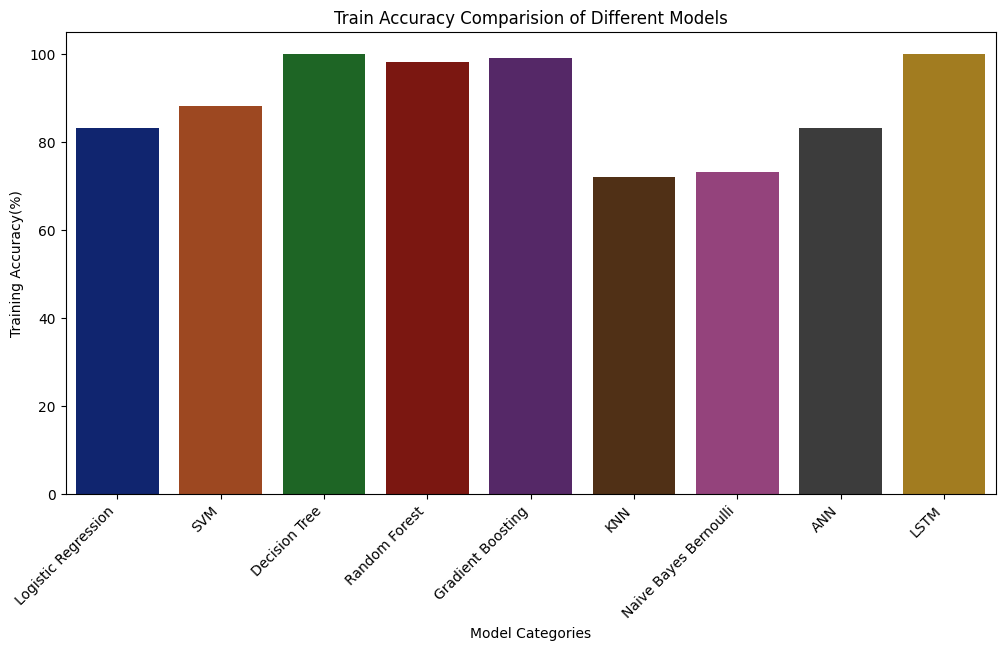

In [59]:
# comparison of models with their accuracy
categories=['Logistic Regression','SVM','Decision Tree','Random Forest','Gradient Boosting','KNN','Naive Bayes Bernoulli','ANN','LSTM']
values=[83,88,100,98,99,72,73,83,100]

plt.figure(figsize=(12,6))
sns.barplot(x=categories,y=values,palette="dark")
plt.title('Train Accuracy Comparision of Different Models')
plt.xlabel('Model Categories')
plt.ylabel('Training Accuracy(%)')
plt.xticks(rotation=45,ha="right")
plt.show()

# Insights:

* After trained various models we can observed that Decision Tree, Gradient Boosting and LSTM model is performed well followed by Random Forest